# Hypothesis Testing with Binomial Distributions

## SWBAT

* Set null and alternative hypotheses around binomial random variables
* Design and run and experiments using binomial distribution for estimations
* Define decision boundaries for results of significance testing  and visualize the output 


## Introduction
When thinking of using a binomial distribuion, think coin flips. For example, suppose we've got a coin, and we want to find out if it's fair i.e. when we flip the coin, are we as likely to see heads as we are to see tails. A null hypothesis for this situation could be:

> **Ho:** We're just as likely to get heads as tails when we flip the coin.

A suitable alternative hypothesis might be:

> **Ha:** We're more likely to see either heads or tails when we flip the coin.

This is a two-sided experiment, since we'll reject the null hypothesis if heads are more likely or if tails are more likely. We could use a one-sided alternative hypothesis like "We're more likely to see tails than heads". 

## Experimental Setting

We need to perform an experiment in order to help test our hypothesis. We can say that in order to test the null hypothesis that heads are just as likely as tails, we are going to toss the coin 100 times and record the results. 

When tossing a fair coin (which is what the null hypothesis states), we would expect that the number of heads (or tails) follows a binomial distribution. This distribution takes two parameters: 

>$n$- the number of individual independent experiments (think number of coin flips)

>$p$- the probability of success of that event (think .5 for a fair coin)



Let's model 100 fair coin flips and observe the number of heads. As the coin is assumed to be fair, we set $p=0.5$.

First, let's import the necessary modules.

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import proportion
sns.set_style('dark')

Let's simulate and visualize a 100-flip event. There are always many ways to perform simulations. You'll learn about two ways to simulate flip coins: using `np.random.random(n)` and using `np.random.binomial(n,p)`

### Simulation using `np.random.random(n)`

One way of simulating a coin flip, is by using `np.random.random(n)`, making it return random numbers in the interval $[0.0, 1.0]$, and count the number where the outputs are less than 0.5.

Next, you treat this count as the total count for heads $n=100$ coin flips.

In [13]:
np.random.seed(17)

# Define p and n values
p = .5
n = 100

#Calculate the number of heads for a random 100 coin flips event. 
heads = (np.random.random(n)<p).sum()

# print number of heads and tails 
heads, (100-heads)
# expected output: (45, 55)

(45, 55)

Next, plot the frequency of heads and tails. 

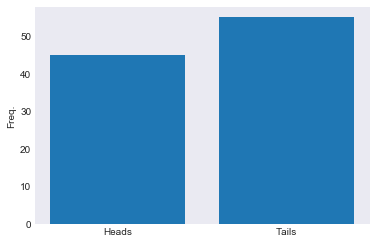

In [14]:
#Plot a frequency table showing number of heads and tails
fig, ax = plt.subplots()
ax.bar([0, 1], [heads, n-heads])
ax.set_xticks((0,1))
ax.set_xticklabels(('Heads', 'Tails'))
ax.set_ylabel('Freq.')
sns.despine()

### Simulation using `np.random.binomial(n,p)`

Another way to simulate a coin flip is through using `np.random.binomial(n,p)`. Let's repeat the experiment below. 

In [15]:
np.random.seed(17)

# Define p and n values
p = .5
n = 100

# Use np.random.binomial() to simulate the number of heads 
heads = np.random.binomial(n,p)

# Print number of heads and tails
heads, 100-heads
# expected output: (51, 49)

(51, 49)

Carrying out this random experiment, we got 45 heads and 55 tails the first time, and 51 heads and 49 tails the second time. If you'd change seeds, these results will change too.

> Can we safely say that the coin is fair? 

Without some further guidelines, it would be very hard to say if this deviation from 50/50 really provides much evidence one way or the other. To proceed any further, we have to have some notion of what we would expect to see in the long run if the null hypothesis was true.

----

### Define the parameters

Let's run the above experiment for 10,000 times and plot a histogram for frequency of heads.

using `np.random.binomial(n,p, size)`, we can also define an extra parameter for defining number of trials for our experiment.

>$size$- the number of times you want to run this experiment (let's set that to 10,000 - experiment with this value and see the effect)

Under the null hypothesis, the probability is 0.5. We can see the expected probability of getting any particular number of heads if we tossed a coin 100 times by plotting the density function for the binomial distribution with parameters 100 and .5 .

Let's model 100 fair coin flips. Since it's fair, $p = 0.5$ , $n=100$ and $size = 10000$. Draw a histogram for the frequency of heads observed.

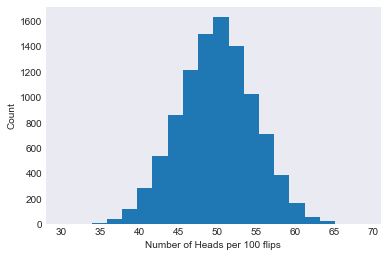

In [38]:
np.random.seed(16)

# Define values of p, n and size
p = .5
n = 100
size = 10000

# Calculate the binomial distribution using np.random.binom()
binom_dist = np.random.binomial(n,p,size)

# Plot a histogram for number of heads 
plt.hist(binom_dist, bins=20)
plt.xlabel('Number of Heads per 100 flips')
plt.ylabel('Count')
plt.show()

As you'd probably expect, the most common value we'd see would be 50, but there are lots of reasonable values that aren't exactly 50 that would also occur pretty often. So to make a decision rule for when we will reject the null hypothesis, we would first decide how often we're willing to reject the null hypothesis when it was actually true. 
Without any compelling reason to choose otherwise, people usually will accept an error of 5% when performing a hypothesis test.

### Develop a decision rule

To come up with a decision rule that would be wrong only 5% of the time: 
>**We need to find the number of heads for which we would see fewer heads 2.5% of the time, and the number of heads for which we would see more heads 2.5% of the time.** i.e. work out the rejection region - the region where you can reject the Null Hypothesis.

We shall use `statsmodels.stats.proportion.binom_test_reject_interval(value, nobs, alpha=0.05, alternative='two-sided')` for calculating the rejection region. 

**Parameters:**	

>value (float) – proportion under the Null hypothesis

>nobs (integer) – the number of trials or observations.

> Returns: Minimum value, Maximum value for Null Hypothesis to be true

In [39]:
# Use statsmodels.stats.proportion.binom_test_reject_interval() 
# calculate minimum and maximum number of heads for given parameters

min_heads, max_heads = proportion.binom_test_reject_interval(.5, n, alpha=0.05, alternative='two-sided')

print(min_heads,max_heads,heads)
# print min_heads, max_heads, heads
# (39.0, 61.0, 45)

39.0 61.0 51


### Findings

So in this experiment, if the number of heads we saw was between 39 and 61 (out of 100 tosses), we would accept the null hypothesis. We would formally state that there's not enough evidence to reject the null hypothesis. 

If we saw fewer than 39 or more than 61 tosses, we would say we had enough evidence to reject the null hypothesis, knowing that we would be wrong only 5% of the time. When we reject the null hypothesis when it was actually true, it's said to be a Type I error. So in this example, we're setting the Type I error rate to 5%.

## Plotting the Acceptance and Rejection Regions

Using the assumptions we made earlier, our findings above and the alpha level we decided on, we can now construct the rejection region for the experiment.T hese are the values of the statistic for which  we shall reject the null hypothesis. 

In this example, the rejection region is broken up into two sections: less than 39 heads and more than 61 heads.

You plot may look something similar to: 
![](plot.png)

Let's plot our findings for presentation:

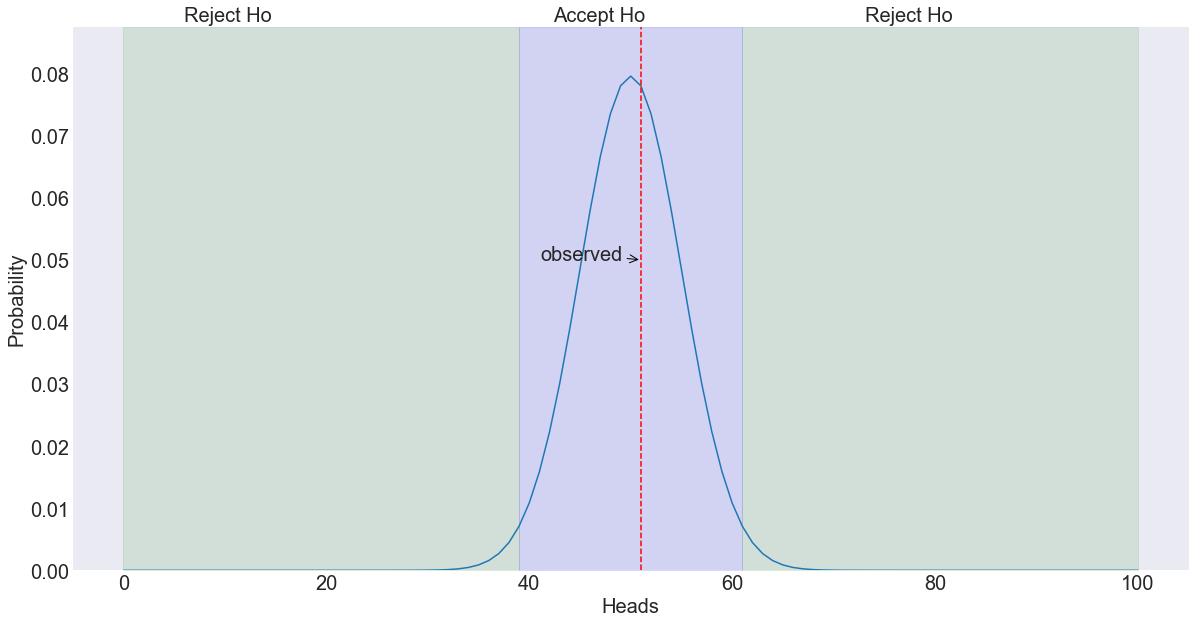

In [51]:
# Use stats.binom to generate a binomial random variable with values on n and p 
rv=stats.binom(n,.5)

#  discrete.pmf(k)
#  Probability mass function at k of the given RV.
max_freq = rv.pmf(n/2)
fig, ax = plt.subplots(figsize=(20, 10))
plt.rc('font', size=20) 

#  Fill the lower region area for rejecting null hypothesis
ax.fill_between([0, min_heads], [max_freq*1.1]*2, alpha=0.1, color='g')
# Fill the area rejection area for accepting null hypothesis
ax.fill_between([min_heads, max_heads], [max_freq*1.1]*2, alpha=0.1, color = 'b')
#  Fill the upper region area for rejecting null hypothesis
ax.fill_between([max_heads, 100], [max_freq*1.1]*2, alpha=0.1, color='g')

# plot the pmf for hundred flips
ax.plot(rv.pmf(np.arange(0, n+1)))
# Plot the observed number of heads
ax.axvline(heads, color='r', ls='--')
ax.annotate('observed', 
            (heads, 0.05), xytext=(-100, 0), 
            xycoords='data', textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))
# Fill the Rejection and Acceptance regions for null hypothesis            
ax.annotate('Reject Ho', (0.1, 1.01), xycoords='axes fraction')
ax.annotate('Accept Ho', (0.43, 1.01), xycoords='axes fraction')
ax.annotate('Reject Ho', ((max_heads/100)+0.1, 1.01), xycoords='axes fraction')
# Define y-limit and label the axes
ax.set(
    ylim=(0, max_freq*1.1),
    xlabel='Heads',
    ylabel='Probability'
)
sns.despine()

## Summary

In this lab, we learnt how to define and set the parameters for a binomial hypothesis testing. We also looked at different stages within experimental setting, from defining a binomial test, identifying rejection regions for null hypothesis. The lesson concluded with an exercise into plotting the findings of this experiment.